1.1. Обучить модель без каких-либо дополнительных условий, которая должна наилучшим
образом отработать на тестовой выборке с точки зрения F-меры.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

In [2]:
features = pd.read_csv("./features_train.csv")
target = pd.read_csv("./classes_train.csv")

In [3]:
features

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,2.449650,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,1.913427,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142
2,704,3108,454,2400,77,0,0,0,1358,0.518409,2.288660,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90
3,6091,304528,526,599,1515,0,1,1,4214,1.445420,72.265781,0.124822,0.142145,0.359516,578.950570,10,0,11,0,51
4,12967,13693,204,1177,452,0,1,1,3200,4.052187,4.279063,0.063750,0.367812,0.141250,67.122549,13,0,14,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,109,13,2,0,5,0,0,0,788,0.138325,0.016497,0.002538,0.000000,0.006345,6.500000,9,0,9,0,124
2396,5503,3,0,0,2,1,1,0,1382,3.981910,0.002171,0.000000,0.000000,0.001447,23524.000000,10,0,18,0,8
2397,2172,35504,0,2,140,1,1,0,1813,1.198014,19.583012,0.000000,0.001103,0.077220,23524.000000,15,0,16,0,130
2398,2513,19,0,0,4,1,1,0,1274,1.972527,0.014914,0.000000,0.000000,0.003140,23524.000000,14,0,17,0,95


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=574836)
X_train

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
2038,31921,95,2,1,7,1,1,0,1581,20.190386,0.060089,0.001265,0.000633,0.004428,47.500000,12,0,15,0,143
782,7659,3554,410,480,158,0,1,1,3998,1.915708,0.888944,0.102551,0.120060,0.039520,8.668293,10,0,14,0,107
251,5302,3586,1611,3323,186,0,1,1,4647,1.140951,0.771681,0.346675,0.715085,0.040026,2.225947,9,0,10,0,60
549,11924,75784,3512,19863,209,0,1,1,4375,2.725486,17.322057,0.802743,4.540114,0.047771,21.578588,7,0,14,0,159
1860,1129,39,0,0,4,1,1,0,1350,0.836296,0.028889,0.000000,0.000000,0.002963,23524.000000,15,0,15,0,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,24063,167,30,9,25,0,0,0,1957,12.295861,0.085335,0.015330,0.004599,0.012775,5.566667,8,0,9,0,129
481,14147,268377,47683,58152,281,0,1,1,2864,4.939595,93.707053,16.649092,20.304469,0.098115,5.628358,15,0,8,0,147
1517,2035,1032,576,1125,42,0,1,1,4313,0.471829,0.239277,0.133550,0.260839,0.009738,1.791667,13,0,14,0,151
1127,3991,9450,5986,6493,52,0,1,1,4390,0.909112,2.152620,1.363554,1.479043,0.011845,1.578684,14,0,20,0,137


Дерево решений из scikit-learn:

In [7]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

       human       0.99      0.99      0.99       543
         bot       0.98      0.98      0.98       177

    accuracy                           0.99       720
   macro avg       0.99      0.99      0.99       720
weighted avg       0.99      0.99      0.99       720



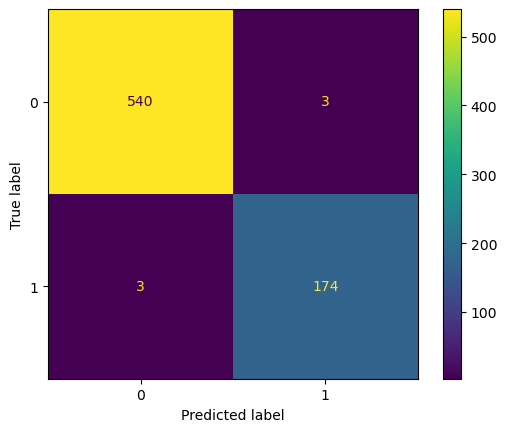

In [8]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
print(classification_report(y_test, y_pred, target_names=['human', 'bot']))

Градиентный бустинг из CatBoost:

Кросс-валидация:

In [44]:
import catboost
from catboost import * 
from catboost import cv

CX_train, CX_test, cy_train, cy_test = train_test_split(X_train, y_train, test_size=0.3, random_state=574836)

params = {
    'loss_function': 'Logloss',
    'iterations': 200,
    'custom_loss': 'F1',
    'random_seed': 63,
    'learning_rate': 0.25
}

cv_data = cv(
    params=params,
    pool=Pool(CX_train, label=cy_train),
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True, 
    verbose=False
)

best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])
print("Best validation Logloss score, stratified: {:.4f}+/-{:.3f} on step {}".format(
best_value, cv_data['test-Logloss-std'][best_iter], best_iter))
best_value = np.min(cv_data['test-F1-mean'])
best_iter = np.argmin(cv_data['test-F1-mean'])
print("Best validation F1 score, stratified: {:.4f}+/-{:.3f} on step {}".format(
best_value, cv_data['test-F1-std'][best_iter], best_iter))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.01648863948
bestIteration = 154

Training on fold [1/5]

bestTest = 0.003984966114
bestIteration = 38

Training on fold [2/5]

bestTest = 0.004306946447
bestIteration = 32

Training on fold [3/5]

bestTest = 0.007686137431
bestIteration = 199

Training on fold [4/5]

bestTest = 0.002566814194
bestIteration = 185

Best validation Logloss score, stratified: 0.0071+/-0.006 on step 199
Best validation F1 score, stratified: 0.9776+/-0.014 on step 0


In [37]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.25,
    eval_metric='F1',
    random_seed=63,
    early_stopping_rounds=20
)

model.fit(CX_train, cy_train,
         eval_set=(CX_test, cy_test),
          verbose=False, plot=True
)

print(f"Model is fitted: {str(model.is_fitted())}")
print(f"Model params: {model.get_params()}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params: {'iterations': 200, 'learning_rate': 0.25, 'random_seed': 63, 'eval_metric': 'F1', 'early_stopping_rounds': 20}


In [38]:
cy_pred = model.predict(X_test)

              precision    recall  f1-score   support

       human       1.00      1.00      1.00       543
         bot       0.99      1.00      0.99       177

    accuracy                           1.00       720
   macro avg       0.99      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



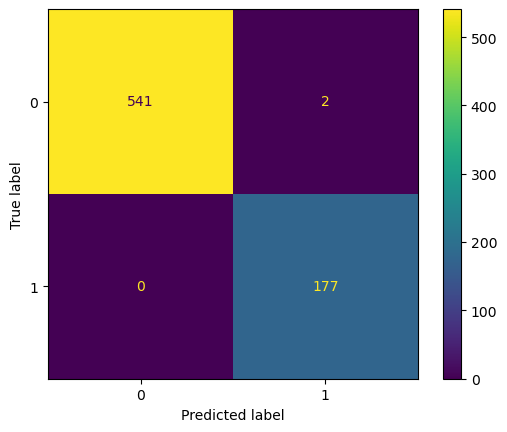

In [39]:
ConfusionMatrixDisplay(confusion_matrix(y_test, cy_pred)).plot()
print(classification_report(y_test, cy_pred, target_names=['human', 'bot']))

По результатам обучения на полной выборке разные классификаторы показывают точность, близкую к 100%.

2.1. Максимально логичным образом обучить качественную модель, использующую для
работы только 10 признаков из всего исходного множества.

Для сокращения пространства признаков используем алгоритм UMAP:

In [4]:
import umap

embedding = umap.UMAP(n_components=10, n_neighbors=30, min_dist=0.09).fit_transform(features)
embedding

array([[ 9.868925 ,  6.3905535,  3.2454762, ...,  5.353486 ,  6.771578 ,
         6.0864577],
       [10.421082 ,  7.0427084,  3.1430628, ...,  4.9725556,  6.3383327,
         5.636351 ],
       [12.95016  ,  8.825157 ,  6.0631237, ...,  5.4719987,  7.0253615,
         6.7189655],
       ...,
       [ 8.55253  ,  5.186981 ,  1.9418566, ...,  4.4049916,  6.0453343,
         4.859159 ],
       [-3.7591155, 11.271693 ,  2.3712454, ...,  4.475305 ,  7.0974827,
         5.8237267],
       [-2.7079208, 10.593458 ,  1.7862995, ...,  4.7844467,  7.3379965,
         5.247711 ]], dtype=float32)

In [5]:
EX_train, EX_test, ey_train, ey_test = train_test_split(embedding, target, test_size=0.25, random_state=8744)

In [21]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

svm = svm.SVC(kernel='linear', C=1.0)
svm = svm.fit(EX_train, ey_train)
ey_pred = svm.predict(EX_test)
#ey_train.values.reshape(ey_train.values.shape[0])

C:\Users\Vladislav\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

       human       0.94      0.99      0.97       448
         bot       0.98      0.82      0.89       152

    accuracy                           0.95       600
   macro avg       0.96      0.90      0.93       600
weighted avg       0.95      0.95      0.95       600



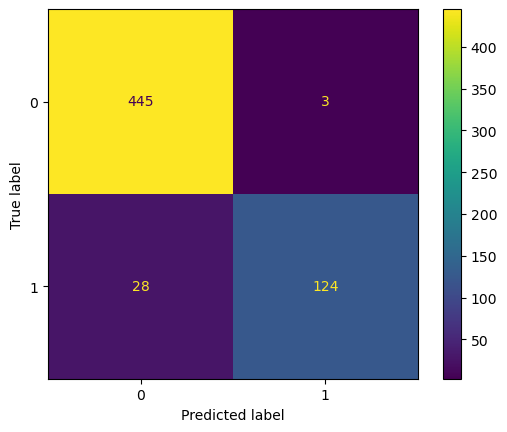

In [22]:
ConfusionMatrixDisplay(confusion_matrix(ey_test, ey_pred)).plot()
print(classification_report(ey_test, ey_pred, target_names=['human', 'bot']))

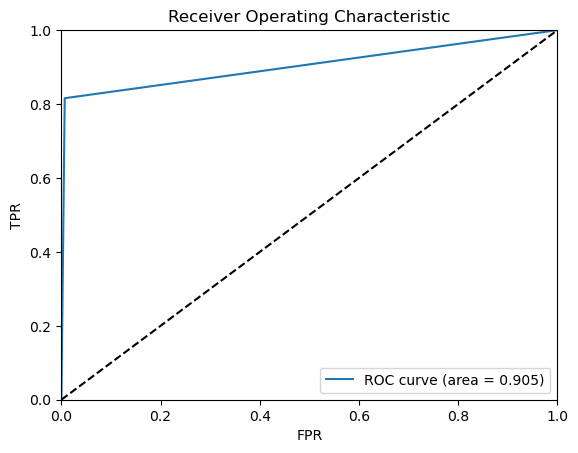

In [29]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(ey_test, ey_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [20]:
import catboost
from catboost import * 
from catboost import cv

CX_train, CX_test, cy_train, cy_test = train_test_split(EX_train, ey_train, test_size=0.3, random_state=574836)

model_with_less_params = CatBoostClassifier(
    iterations=250,
    learning_rate=0.255,
    eval_metric='AUC',
    random_seed=63,
    #early_stopping_rounds=20
)

model_with_less_params.fit(CX_train, cy_train,
         eval_set=(CX_test, cy_test),
          verbose=False, plot=True
)

print(f"Model is fitted: {str(model_with_less_params.is_fitted())}")
print(f"Model params: {model_with_less_params.get_params()}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params: {'iterations': 250, 'learning_rate': 0.255, 'random_seed': 63, 'eval_metric': 'AUC'}


In [16]:
cy_pred = model_with_less_params.predict(EX_test)

              precision    recall  f1-score   support

       human       0.98      0.98      0.98       448
         bot       0.94      0.93      0.93       152

    accuracy                           0.97       600
   macro avg       0.96      0.95      0.96       600
weighted avg       0.97      0.97      0.97       600



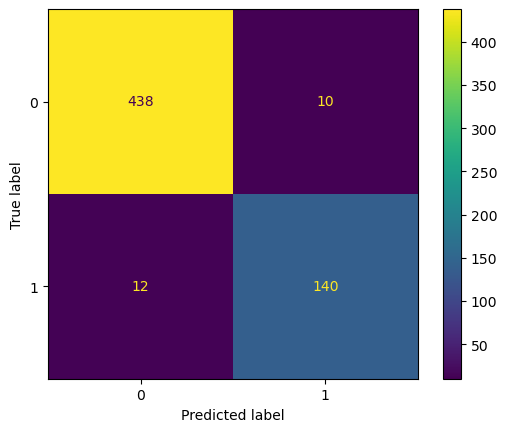

In [17]:
ConfusionMatrixDisplay(confusion_matrix(ey_test, cy_pred)).plot()
print(classification_report(ey_test, ey_pred, target_names=['human', 'bot']))

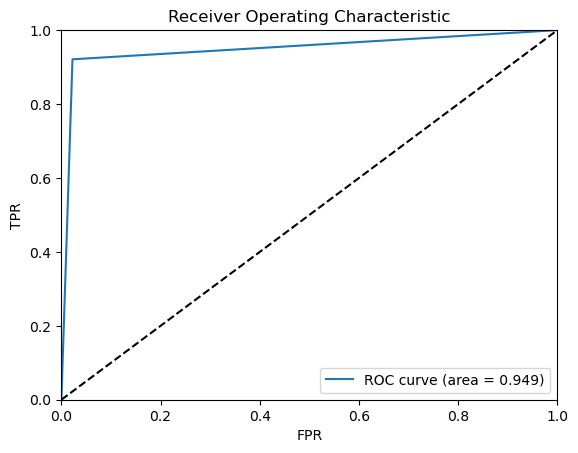

In [28]:
fpr, tpr, thresholds = roc_curve(ey_test, cy_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [9]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(RandomForestClassifier(), 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(EX_train, ey_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Vladislav\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 11,
 'bootstrap': True}

In [10]:
from sklearn.model_selection import GridSearchCV
n_estimators = [400,500]
max_depth = [13,14,15]
min_samples_split = [22,23,24]
min_samples_leaf = [2,3,4]
max_features = ['sqrt']
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

gs = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(EX_train, ey_train)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\Vladislav\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 23,
 'n_estimators': 400}

              precision    recall  f1-score   support

       human       0.97      0.98      0.98       448
         bot       0.95      0.91      0.93       152

    accuracy                           0.96       600
   macro avg       0.96      0.95      0.95       600
weighted avg       0.96      0.96      0.96       600



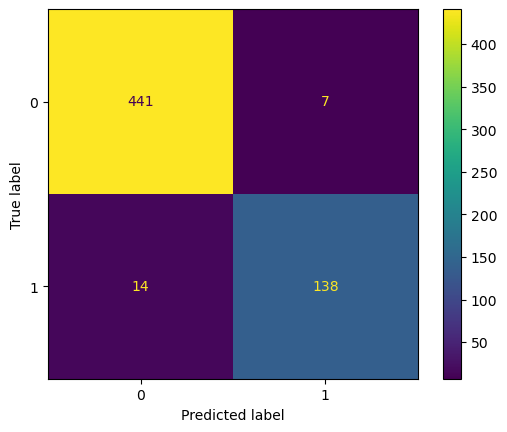

In [11]:
best_pred = rfc_3.predict(EX_test)
ConfusionMatrixDisplay(confusion_matrix(ey_test, best_pred)).plot()
print(classification_report(ey_test, best_pred, target_names=['human', 'bot']))

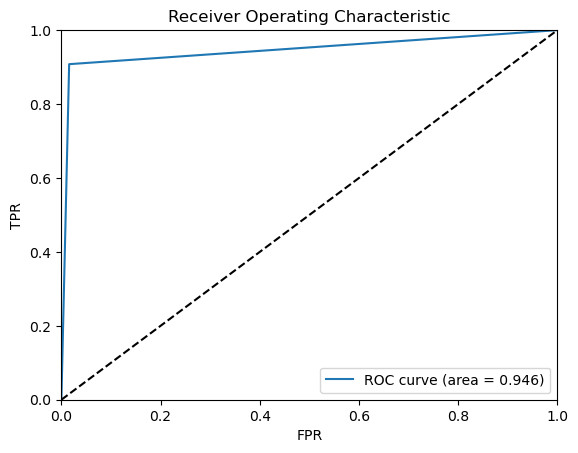

In [30]:
fpr, tpr, thresholds = roc_curve(ey_test, best_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Можно увидеть, что при сокращении количества признаков до 10 модели всё ещё сохраняют приемлемую точность классификации. Метод опорных векторов даёт минимальную вероятность ложного срабатывания, а градиентный бустинг обеспечивает минимальную вероятность пропуска ботов.